In [72]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
import numpy as np
import scipy.signal

#%matplotlib notebook
%matplotlib inline
mpl.rcParams['figure.figsize'] = (18, 6)


In [73]:
import os, glob, sys

files = glob.glob('csv/c*.csv')
# make sure we get a consistent order.
files.sort()
data = []
for name in files: 
    try:
        print " reading  file " + name
        thisfile = np.loadtxt(name, skiprows=1, usecols=tuple([0,1,2,3,4]),delimiter=",")
        thisfile = scipy.signal.decimate(thisfile, 10, n=None, ftype='iir', axis=0, zero_phase=True)
        data.append(thisfile)
    except IOError as exc:
        if exc.errno != errno.EISDIR:
            pass
        else: # Do not fail if a directory is found, just ignore it.
            raise exc # Propagate other kinds of IOError.
#c = np.loadtxt("c18-06-24-12_00.csv",skiprows=1,usecols=(0,1,2,3,4),delimiter=",")
#c = np.loadtxt("c18-07-01-12_00.csv",skiprows=1,usecols=(0,1,2,3,4),delimiter=",")
#print(c.shape)
print "done"

 reading  file csv\c18-06-21-02_10.csv
 reading  file csv\c18-06-22-12_00.csv
 reading  file csv\c18-06-23-12_00.csv
 reading  file csv\c18-06-24-12_00.csv
 reading  file csv\c18-06-25-12_00.csv
 reading  file csv\c18-06-26-12_00.csv
 reading  file csv\c18-06-27-12_00.csv
 reading  file csv\c18-06-28-12_00.csv
 reading  file csv\c18-06-29-12_00.csv
 reading  file csv\c18-06-30-12_00.csv
 reading  file csv\c18-07-01-12_00.csv
 reading  file csv\c18-07-02-02_03.csv
 reading  file csv\c18-07-02-02_04.csv
 reading  file csv\c18-07-02-02_18.csv
 reading  file csv\c18-07-02-12_00.csv
 reading  file csv\c18-07-03-12_00.csv
 reading  file csv\c18-07-04-12_00.csv
 reading  file csv\c18-07-05-12_00.csv
 reading  file csv\c18-07-06-12_00.csv
 reading  file csv\c18-07-07-12_00.csv
 reading  file csv\c18-07-08-12_00.csv
 reading  file csv\c18-07-09-12_00.csv
 reading  file csv\c18-07-10-12_00.csv
 reading  file csv\c18-07-11-12_00.csv
 reading  file csv\c18-07-12-12_00.csv
 reading  file csv\c18-07

In [74]:
# massage data and plot

newd = []
for d in data[:]:
    if d.shape[0] > 7420:
        print d.shape
        newd.append(d[1:7420,:])
#del data
print newd[0]
                    

(7429L, 5L)
(7428L, 5L)
(7429L, 5L)
(7428L, 5L)
(7428L, 5L)
(7429L, 5L)
(7428L, 5L)
(7428L, 5L)
(7429L, 5L)
(7429L, 5L)
(7429L, 5L)
(7429L, 5L)
(7428L, 5L)
(7429L, 5L)
(7429L, 5L)
(7429L, 5L)
(7429L, 5L)
(7429L, 5L)
(7429L, 5L)
(7429L, 5L)
(7429L, 5L)
(7429L, 5L)
(7429L, 5L)
(7429L, 5L)
(7429L, 5L)
(7429L, 5L)
(7429L, 5L)
(7429L, 5L)
(7428L, 5L)
(7429L, 5L)
(7429L, 5L)
(7429L, 5L)
(7429L, 5L)
(7429L, 5L)
(7429L, 5L)
(7429L, 5L)
(7429L, 5L)
(7429L, 5L)
(7428L, 5L)
(7429L, 5L)
(7429L, 5L)
(7429L, 5L)
(7429L, 5L)
(7429L, 5L)
(7429L, 5L)
(7428L, 5L)
(7429L, 5L)
(7429L, 5L)
(7429L, 5L)
(7429L, 5L)
(7429L, 5L)
(7429L, 5L)
(7429L, 5L)
(7428L, 5L)
(7429L, 5L)
(7429L, 5L)
(7428L, 5L)
(7429L, 5L)
(7429L, 5L)
(7429L, 5L)
(7428L, 5L)
(7429L, 5L)
(7429L, 5L)
(7429L, 5L)
(7429L, 5L)
(7429L, 5L)
(7429L, 5L)
(7428L, 5L)
(7429L, 5L)
(7429L, 5L)
(7429L, 5L)
(7429L, 5L)
(7429L, 5L)
(7429L, 5L)
(7428L, 5L)
(7429L, 5L)
(7429L, 5L)
(7429L, 5L)
(7429L, 5L)
(7429L, 5L)
(7429L, 5L)
(7429L, 5L)
(7429L, 5L)
(742

(7419L,)
[[3.38344592e-05 3.38343799e-05 3.38343797e-05]
 [3.38342722e-05 3.38343799e-05 3.38343798e-05]
 [3.38344906e-05 3.38343798e-05 3.38343798e-05]
 ...
 [3.38339250e-05 3.38343798e-05 3.38343799e-05]
 [3.38349350e-05 3.38343798e-05 3.38343798e-05]
 [3.38338907e-05 3.38343798e-05 3.38343798e-05]]


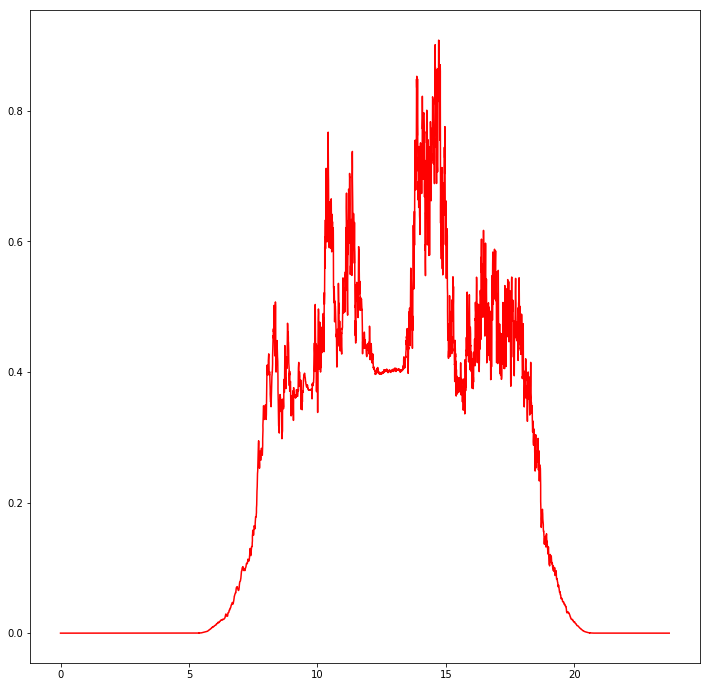

In [23]:
c = newd[2]
time = c[:,0]
time = (time - time[0])/3600

cmean = np.mean(c[:,1:4],axis=1)
print cmean.shape

#plt.plot(time,c[:,1] -cmean,'r')
#plt.plot(time,c[:,2] - cmean ,'g')
#plt.plot(time,c[:,3]- cmean,'b')

#plt.plot(time,cmean,'k')
#plt.savefig("graph.png")

normc = c[:,1:4]/np.max(c[:,1:4])
plt.plot(time,normc[:,1],'r')

print normc

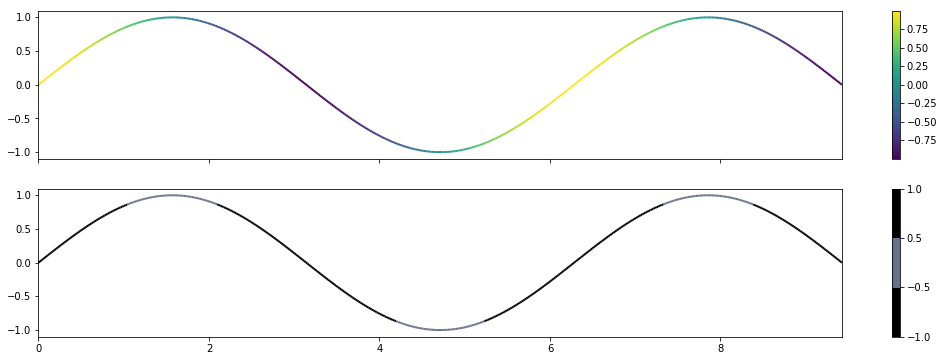

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

x = np.linspace(0, 3 * np.pi, 500)
y = np.sin(x)
dydx = np.cos(0.5 * (x[:-1] + x[1:]))  # first derivative

# Create a set of line segments so that we can color them individually
# This creates the points as a N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(dydx.min(), dydx.max())
lc = LineCollection(segments, cmap='viridis', norm=norm)
# Set the values used for colormapping
lc.set_array(dydx)
lc.set_linewidth(2)
line = axs[0].add_collection(lc)
fig.colorbar(line, ax=axs[0])

# Use a boundary norm instead

cmap = ListedColormap(normc, name='skycolor', N=None)

#cmap = ListedColormap(['r', 'g', 'b'])
norm = BoundaryNorm([-1, -0.5, 0.5, 1], cmap.N)
lc = LineCollection(segments, cmap=cmap, norm=norm)
lc.set_array(dydx)
lc.set_linewidth(2)
line = axs[1].add_collection(lc)
fig.colorbar(line, ax=axs[1])

axs[0].set_xlim(x.min(), x.max())
axs[0].set_ylim(-1.1, 1.1)
plt.show()

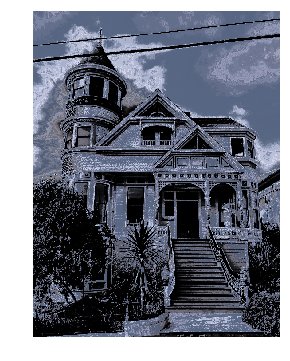

<Figure size 1296x432 with 0 Axes>

In [76]:
from PIL import Image

fname = 'stoch.png'
image = Image.open(fname).convert("L")
arr = np.asarray(image)
plt.imshow(arr, cmap=cmap)
plt.axis('off')  
plt.show()
plt.savefig("stoch-skycolor.png")

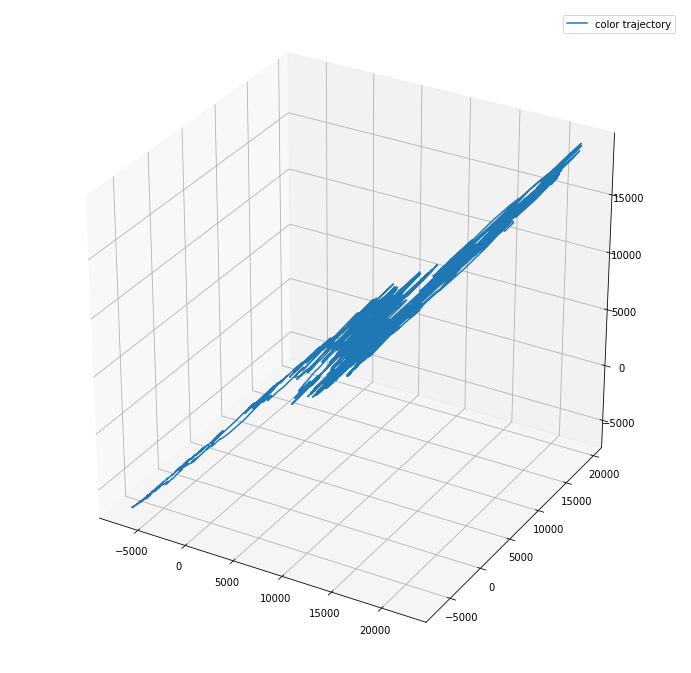

<Figure size 864x864 with 0 Axes>

In [19]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['figure.figsize'] = (12,12)


fig = plt.figure()
ax = fig.gca(projection='3d')
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)
cmean = np.mean(c[:,1:4])
ax.plot(c[:,3]-cmean, c[:,2]-cmean, c[:,1] -cmean, label='color trajectory')
ax.legend()


plt.show()
plt.savefig("stoch-skycolor.png")

In [36]:
c = newd[2]
tdim = c[:,0]
tdim = (tdim - tdim[0])/3600
dawn = np.where((tdim > 5.5) * (tdim < 10.))

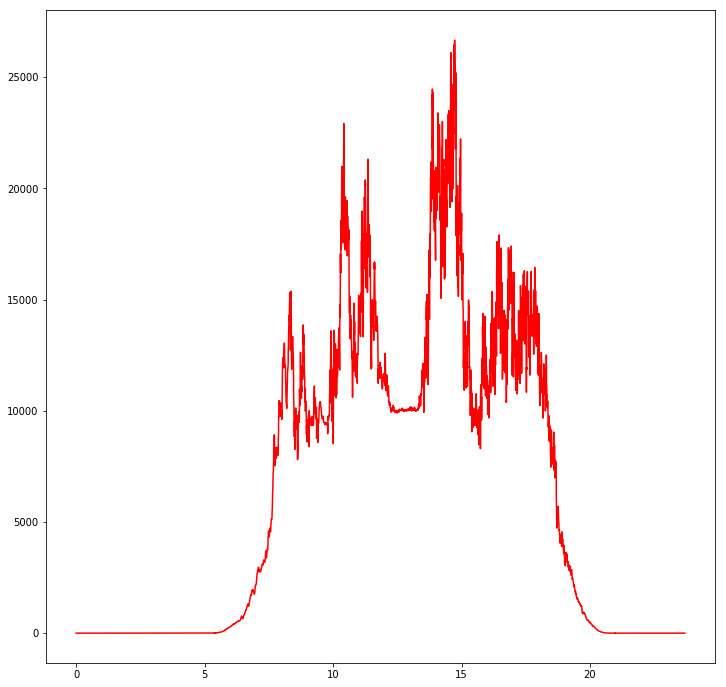

In [40]:
#print(dawn)
start = int(4*3600)
end = int(22.0*3600)
tbase = (c[start:end,0] - c[0,0])/3600.
plt.plot(tdim, c[:,1],'r')


In [57]:
start = 4000
end =   4100
red = np.array(c[start:end,1])
grn = np.array(c[start:end,2])
blu = np.array(c[start:end,3])

print red.shape
mmax = np.max([np.max(red), np.max(blu), np.max(grn)])

red = red/mmax
grn = grn/mmax
blu = blu/mmax


colors = []
for i, r in enumerate(red):
    colors.append(mpl.colors.to_rgb((red[i],grn[i],blu[i])))

#print(colors)


(100L,)


In [71]:
# create include file
def rgb_to_hex(r, g, b):
    hc = int(b*255)
    hc = hc + (int(g*255) << 8)
    hc = hc + (int(r*255) << 16)
    return "0x{:x}".format(hc)

c = newd[2]
red = np.array(c[:,1])
grn = np.array(c[:,2])
blu = np.array(c[:,3])

print red.shape
mmax = np.max([np.max(red), np.max(blu), np.max(grn)])

red = red/mmax
grn = grn/mmax
blu = blu/mmax

cinc = open("colors.h",'w')

cinc.write("const PROGMEM prog_uint32_t ctable[]={")

for i, r in enumerate(red):
    c = rgb_to_hex(red[i],grn[i],blu[i])
    # create hex color:
    # will have extra comma at end, sorry
    if i == len(red) -1:
        cinc.write("{:s}}};\n".format(c) )
    else:
        cinc.write("{:s},\n".format(c) )

cinc.write("\n#define CTAB_LEN {:d}\n".format(i) )
cinc.write("#define SECS_PER_C {:f}\n".format((24*3600.)/i) )
cinc.close()
    

(7419L,)


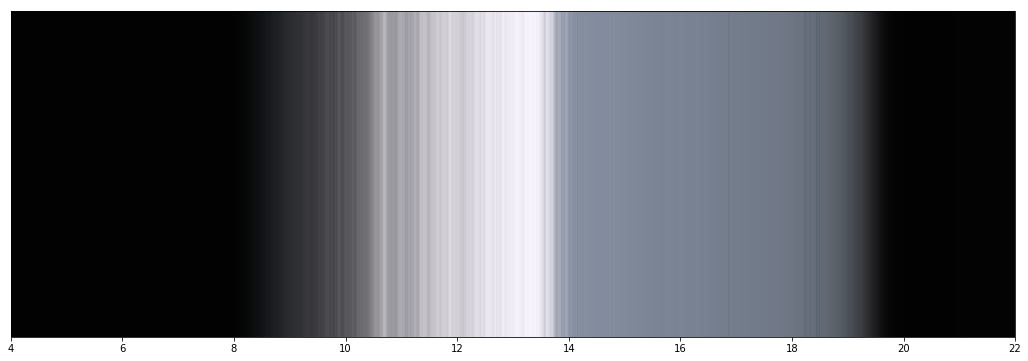

In [91]:
mpl.rcParams['figure.figsize'] = (18, 6)

fig, ax = plt.subplots()

#cmap = mpl.cm.cool
#colors = ["#eaa941", "#efef39", "#53a447", "#3b387f", "#48a2ba"]
cmap= mpl.colors.ListedColormap(colors)

norm = mpl.colors.Normalize(vmin=4, vmax=22.0)

cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
#cb1.set_label('Some Units')
fig.show()
plt.savefig("colorbar.png")

In [9]:
print(65535/mmax)

2.199234873653478


In [45]:
with open('skycolors.csv', 'w+') as f:
    for i, r in enumerate(red):
        f.write("{:f},{:f},{:f}\n".format(red[i],grn[i],blu[i]))

    

(3L, 7419L)
(3000L, 742L, 3L)


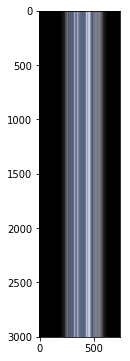

In [79]:


import scipy.signal

def proc_map():
    pass

from PIL import Image, ImageDraw

colors = np.array((red, grn,blu))
print colors.shape
dcol =  scipy.signal.decimate(colors, 10, n=None, ftype='iir', axis=1, zero_phase=True)

dcol_wide = np.multiply.outer(np.ones((3000)),dcol)
dcol_wide = np.swapaxes(dcol_wide,1,2)
print dcol_wide.shape

#img = Image.new('RGB', dcol, color = 'red')

#img.save('pil_red.png')

plt.imshow(dcol_wide)

In [80]:
import scipy.signal
from PIL import Image, ImageDraw

days_raw = np.array([],dtype=float)
for d in newd[:]:
    colors = d[:,1:4]
    # gamma correct
    #colors = colors/np.max(colors)

    #colors = colors/mmax
    
    print colors.shape
    dcol = colors
    #dcol =  scipy.signal.decimate(colors, 10, n=None, ftype='iir', axis=0, zero_phase=True)
    #dcol =  scipy.signal.decimate(dcol, 10, n=None, ftype='iir', axis=0, zero_phase=True)
    dcol_wide = np.multiply.outer(np.ones((10)),dcol)
    if len(days_raw) == 0:
        days_raw = dcol_wide
    else:
        days_raw = np.concatenate((days_raw,dcol_wide),0)
    print days_raw.shape
    #days_raw.extend(dcol_wide)

    
#dcol_wide = np.multiply.outer(np.ones((500)),dcol)
#dcol_wide = np.swapaxes(dcol_wide,1,2)
days_raw = np.array(days_raw,dtype=float)
#print days.shape
print "done"

(7419L, 3L)
(10L, 7419L, 3L)
(7419L, 3L)
(20L, 7419L, 3L)
(7419L, 3L)
(30L, 7419L, 3L)
(7419L, 3L)
(40L, 7419L, 3L)
(7419L, 3L)
(50L, 7419L, 3L)
(7419L, 3L)
(60L, 7419L, 3L)
(7419L, 3L)
(70L, 7419L, 3L)
(7419L, 3L)
(80L, 7419L, 3L)
(7419L, 3L)
(90L, 7419L, 3L)
(7419L, 3L)
(100L, 7419L, 3L)
(7419L, 3L)
(110L, 7419L, 3L)
(7419L, 3L)
(120L, 7419L, 3L)
(7419L, 3L)
(130L, 7419L, 3L)
(7419L, 3L)
(140L, 7419L, 3L)
(7419L, 3L)
(150L, 7419L, 3L)
(7419L, 3L)
(160L, 7419L, 3L)
(7419L, 3L)
(170L, 7419L, 3L)
(7419L, 3L)
(180L, 7419L, 3L)
(7419L, 3L)
(190L, 7419L, 3L)
(7419L, 3L)
(200L, 7419L, 3L)
(7419L, 3L)
(210L, 7419L, 3L)
(7419L, 3L)
(220L, 7419L, 3L)
(7419L, 3L)
(230L, 7419L, 3L)
(7419L, 3L)
(240L, 7419L, 3L)
(7419L, 3L)
(250L, 7419L, 3L)
(7419L, 3L)
(260L, 7419L, 3L)
(7419L, 3L)
(270L, 7419L, 3L)
(7419L, 3L)
(280L, 7419L, 3L)
(7419L, 3L)
(290L, 7419L, 3L)
(7419L, 3L)
(300L, 7419L, 3L)
(7419L, 3L)
(310L, 7419L, 3L)
(7419L, 3L)
(320L, 7419L, 3L)
(7419L, 3L)
(330L, 7419L, 3L)
(7419L, 3L)
(340L, 

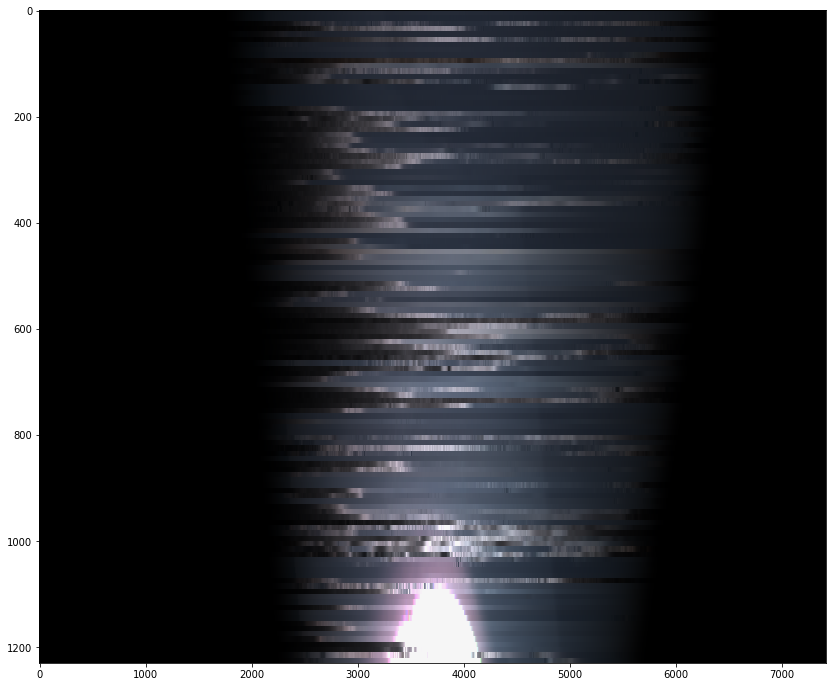

In [82]:
import gc
gc.collect()
import imageio

#plt.imshow(daysg)


mpl.rcParams['figure.figsize'] = (24, 12)
daysn = days_raw/np.max(days_raw)
#img = Image.new('RGB', dcol, color = 'red')
imageio.imwrite('days-norm.png', (255*daysn).astype(np.uint8))
#img.save('pil_red.png')

plt.imshow(daysn,aspect=5)


In [1]:
import imageio

daysg = (daysn)**(1/1.5)
plt.imshow(daysg, aspect=5)
imageio.imwrite('days-gamma.png', (255*daysg).astype(np.uint8))

NameError: name 'daysn' is not defined

In [84]:
import imageio

#plt.imshow(daysg)
imageio.imwrite('days-norm.png', (255*daysn).astype(np.uint8))
imageio.imwrite('days-gamma.png', (255*daysn).astype(np.uint8))

#img = Image.fromarray(days).convert('RGB')

#img.save('days.png')


saved frame000.png
saved
saved frame001.png
saved frame002.png
saved frame003.png
saved frame004.png
saved frame005.png
saved frame006.png
saved frame007.png
saved frame008.png
saved frame009.png
saved frame010.png
saved frame011.png
saved frame012.png
saved frame013.png
saved frame014.png
saved frame015.png
saved frame016.png
saved frame017.png
saved frame018.png
saved frame019.png
saved frame020.png
saved frame021.png
saved frame022.png
saved frame023.png
saved frame024.png
saved frame025.png
saved frame026.png
saved frame027.png
saved frame028.png
saved frame029.png
saved frame030.png
saved frame031.png
saved frame032.png
saved frame033.png
saved frame034.png
saved frame035.png
saved frame036.png
saved frame037.png
saved frame038.png
saved frame039.png
saved frame040.png
saved frame041.png
saved frame042.png
saved frame043.png
saved frame044.png
saved frame045.png
saved frame046.png
saved frame047.png
saved frame048.png
saved frame049.png
saved frame050.png
saved frame051.png
saved 

saved frame431.png
saved frame432.png
saved frame433.png
saved frame434.png
saved frame435.png
saved frame436.png
saved frame437.png
saved frame438.png
saved frame439.png
saved frame440.png
saved frame441.png
saved frame442.png
saved frame443.png
saved frame444.png
saved frame445.png
saved frame446.png
saved frame447.png
saved frame448.png
saved frame449.png
saved frame450.png
saved frame451.png
saved frame452.png
saved frame453.png
saved frame454.png
saved frame455.png
saved frame456.png
saved frame457.png
saved frame458.png
saved frame459.png
saved frame460.png
saved frame461.png
saved frame462.png
saved frame463.png
saved frame464.png
saved frame465.png
saved frame466.png
saved frame467.png
saved frame468.png
saved frame469.png
saved frame470.png
saved frame471.png
saved frame472.png
saved frame473.png
saved frame474.png
saved frame475.png
saved frame476.png
saved frame477.png
saved frame478.png
saved frame479.png
saved frame480.png
saved frame481.png
saved frame482.png
saved frame4

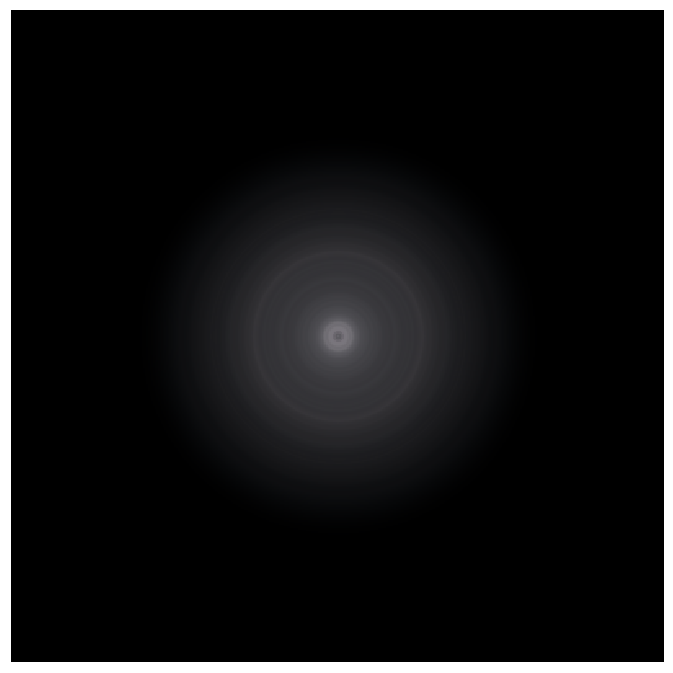

In [88]:
# radial plot

def getcolor(cmap, frac):
    """ go fraction into cmap and return a color triple """
    l, w = cmap.shape
    assert(w ==3)
    i = int(l*frac)
    if i >= l:
        i = l-1
    if i < 0:
        i = 0
    return cmap[i,:]
    

width = 400
height = 400
out = np.zeros((width,height,3),dtype=float)

offset = np.arange(-0.1,1.0, 0.002)
#offset =[0.]
for i, off in enumerate(offset):
    for w in range(width):
        for h in range(height):

            x = (w - width/2)/float(width) 
            y = (h - height/2)/float(height)
            r = np.sqrt(x*x + y*y)
            #th = np.arctan2(y,x)
            #day = int(100*th*4/2*np.pi)
            # want to show morning, so outside (max) is zero and inside (min) is 1/2
            out[h,w] = getcolor(daysg[1200],0.5*(1 + off -r))
        
        
    
    fname  = "frame{:03d}.png".format(i)
    imageio.imwrite(fname, (255*out).astype(np.uint8))
    print "saved " + fname
    if i ==0 :
        fig = plt.figure(frameon=False, figsize = (12,12))
        plt.imshow(out)
        plt.axis('off')  
        fig.axes[0].get_xaxis().set_visible(False)
        fig.axes[0].get_yaxis().set_visible(False)
        #plt.savefig('advance{:03d}.png'.format(i),bbox_inches='tight', pad_inches=0)
        print "saved"
    # to convert to gif with imagemagick
    #$ /cygdrive/c/Program\ Files/ImageMagick-7.0.5-Q16/convert.exe   -delay 7 -loop 0 frame*.png ani.gif
#ffmpeg -r 15 -f image2  -i frame%03d.png -vcodec libx264 -crf 25 -pix_fmt yuv420p  test.mp4


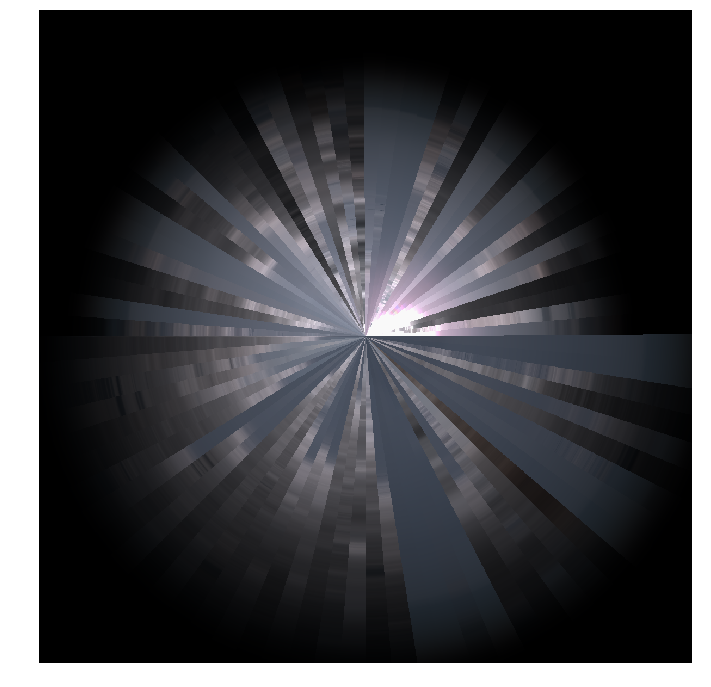

In [89]:
# radial plots

def getcolor(cmap, frac):
    """ go fraction into cmap and return a color triple """
    l, w = cmap.shape
    assert(w ==3)
    i = int(l*frac)
    if i >= l:
        i = l-1
    if i < 0:
        i = 0
    return cmap[i,:]
    

width = 1200
height = 1200
out = np.zeros((width,height,3),dtype=float)

for w in range(width):
    for h in range(height):

        x = (w - width/2)/float(width) 
        y = (h - height/2)/float(height)
        r = np.sqrt(x*x + y*y)
        th = np.arctan2(y,x)
        #print x, y, r
        #out[w,h,:] = [0, 0, 0]
        day = int(100*th*8/(2*np.pi))
        # want to show morning, so outside (max) is zero and inside (min) is 1/2
        out[h,w] = getcolor(daysg[day],0.5*(1-r))
        # want to show evening, so outside (max) is 1 and inside (min) is 1/2
        #out[h,w] = getcolor(days[200],1.2*(r + 1)/2)
        #out[h,w] = getcolor(days[200],r)
        
        
    

plt.figure(figsize = (12,12))
plt.imshow(out)
plt.axis('off')    
plt.savefig('radial4.png')

In [145]:
img.save('radialdays.png')

NameError: name 'img' is not defined

In [ ]:
def get_colors_for(c):
    red = c[:,1]
    grn = c[:,2]
    blu = c[:,3]

    mmax = np.max([np.max(red), np.max(blu), np.max(grn)])

    red = red/mmax
    grn = grn/mmax
    blu = blu/mmax


    colors = []
    for i, r in enumerate(red):
        colors.append(mpl.colors.to_rgb((red[i],grn[i],blu[i])))
    return colors

c = get_colors_for(newdata[0])


In [10]:
newd = np.array(newd)
print newd.shape

(10L, 74199L, 5L)


(7419L, 5L)
(7419L, 3L)


ValueError: zero-size array to reduction operation minimum which has no identity

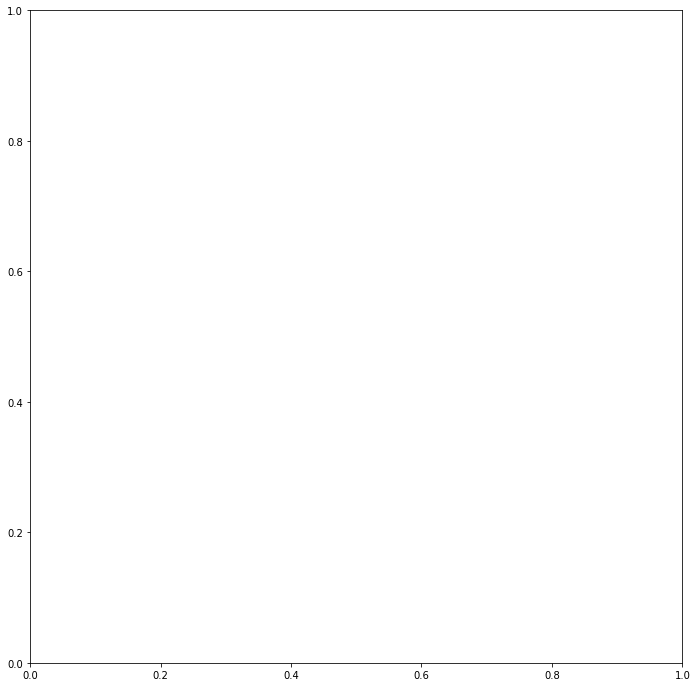

In [87]:
# make rectangular jpeg to wrap a sphere
import scipy.signal
from PIL import Image, ImageDraw

cmap = []
for d in newd[3:4]:
    print d.shape
    colors = d[:,1:4]
    # gamma correct
    colors = (colors / 65535.)**(1/2.2)
    colors = colors/np.max(colors)
    #colors = colors/mmax
    
    print colors.shape
    dcol =  scipy.signal.decimate(colors, 10, n=None, ftype='iir', axis=0, zero_phase=True)
    dcol_wide = np.multiply.outer(np.ones((1000)),dcol)
    cmap.extend(dcol_wide)
    
#dcol_wide = np.multiply.outer(np.ones((500)),dcol)
#dcol_wide = np.swapaxes(dcol_wide,1,2)
cmap = np.swapaxes(cmap,0,1)
cmap = np.array(cmap,dtype=float)
#print days.shape

#daysn = days/np.max(days)

#plt.imshow(cmap[1500:7500,:])
fig = plt.figure(frameon=False, figsize = (12,12))
plt.imshow(cmap[1500:7500,:])
plt.axis('off')  
fig.axes[0].get_xaxis().set_visible(False)
fig.axes[0].get_yaxis().set_visible(False)
plt.savefig('cmap.jpg',bbox_inches='tight', pad_inches=0)

In [ ]:
   fig = plt.figure(frameon=False, figsize = (12,12))
    plt.imshow(out)
    plt.axis('off')  
    fig.axes[0].get_xaxis().set_visible(False)
    fig.axes[0].get_yaxis().set_visible(False)
    plt.savefig('advance{:03d}.png'.format(i),bbox_inches='tight', pad_inches=0)